In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv


In [2]:
from ydata_profiling import ProfileReport

In [3]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as plt
import cufflinks as cl

In [4]:
!pip install cufflinks

In [5]:
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
py.offline.init_notebook_mode(connected=True)
cl.go_offline()

In [7]:
ds=pd.read_csv('C:\\Users\\Admin\\excel\\Walmart_Sales.csv')

In [8]:
ds

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Exploratory Data Anlaysis

In [10]:
ds1=ds.profile_report()

In [11]:
ds1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 15.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [13]:
ds.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [15]:
ds.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [16]:
ds.drop('Date', axis=1, inplace=True)
#dropping date column as it does not have any significance in our model


In [17]:
ds.isna().sum()
#our datasset has 0 null values

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [18]:
ds.corr()
#finding correaltion between columns

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [19]:
ds.shape
#dataset has this much values across this much columns

(6435, 7)

Data Visualization

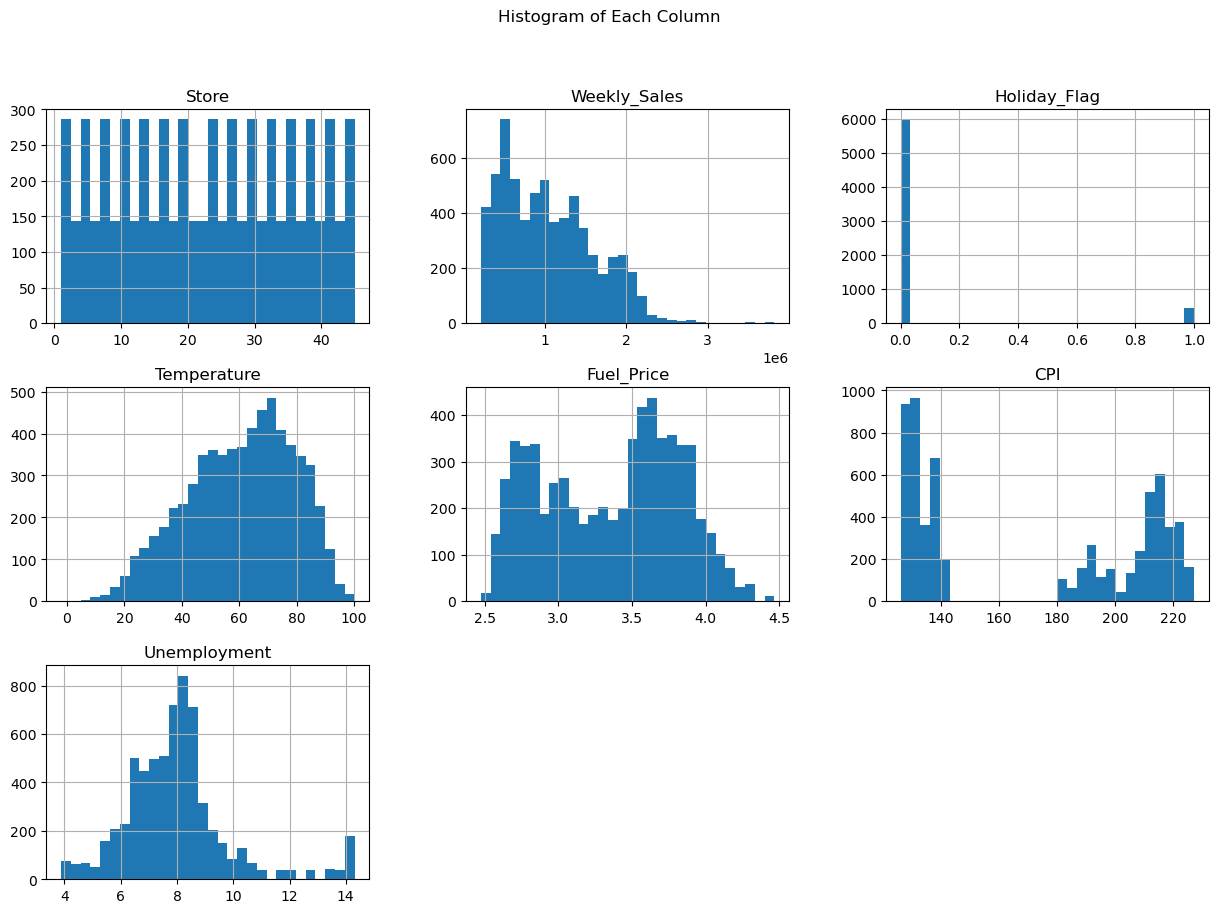

In [21]:

import matplotlib.pyplot as plt

ds.hist(figsize=(15,10), bins=30)
plt.suptitle('Histogram of Each Column')
plt.show()
            

In [22]:
#as we can see the data is good and does not need any preprocessing

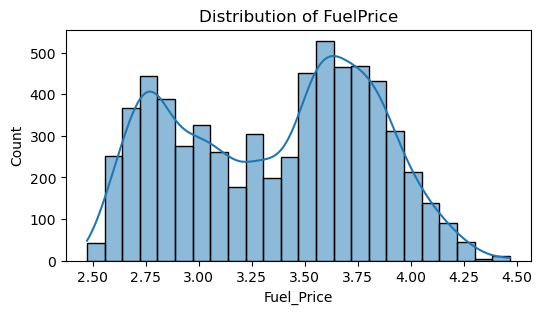

In [23]:
#DATA VISUALIZATION
# Distribution of FuelPrice
plt.figure(figsize=(6, 3))
sns.histplot(ds['Fuel_Price'], kde=True)
plt.title('Distribution of FuelPrice')
plt.show()

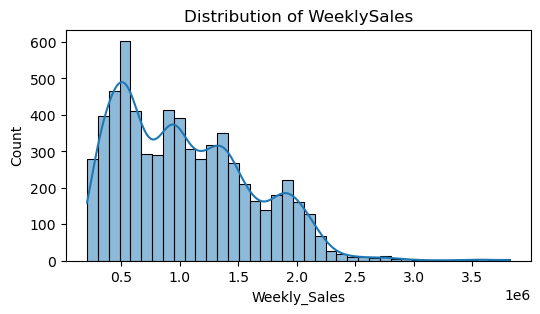

In [24]:
#DATA VISUALIZATION
# Distribution of Weeklysales
plt.figure(figsize=(6, 3))
sns.histplot(ds['Weekly_Sales'], kde=True)
plt.title('Distribution of WeeklySales')
plt.show()

In [25]:
X=ds.drop(['Fuel_Price'],axis=1,inplace=False)
y=ds['Fuel_Price']

In [59]:
#consider fuelprice as dependent variable and our target
#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25,shuffle=True)
print(X.shape)
print(y.shape)


(6435, 6)
(6435,)


In [61]:
from sklearn.linear_model import LinearRegression
LinearRegressionModel = LinearRegression(fit_intercept=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [63]:
y_pred = LinearRegressionModel.predict(X_test)

In [65]:
y_pred

array([3.34108334, 3.50215646, 3.26175239, ..., 3.36059892, 3.50944614,
       3.4010239 ])

In [67]:
from sklearn.metrics import mean_squared_error 
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print(MSEValue)

0.19842403274434237


In [71]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

R-squared Score: 0.07782148833828761
